# JP Math Review 2024: <br> <br> Introduction to NetCDF Data Crunching with Python's Xarray

Phadtaya (Pad) Poemnamthip <br> Date: 7/22/2024

## Outline
- (Prereq.) Python installation
- CMIP6 Dataset downloading/opening from CMIP6 Google Cloud Data (* Update 7/22: There is also WHOI CMIP6 server. Check out http://cmip6.whoi.edu/ .
- Data analysis and plotting

## 1. Preamble

Some useful websites to learn Python basics:
- Official tutorial: https://docs.python.org/3/tutorial/index.html
- Online lecture notes by my first Python teacher (Dr. Fabien Maussion): https://fabienmaussion.info/climate_system/welcome.html

A good place to learn Big Data Geoscience:
- https://pangeo.io/

### Installing Python

 - Please check out the Python Math review class: https://github.com/Fuchan2004/Python_Math_Review/blob/main/Install_Instructions.md
 - *BUT* we will use a different environment in this class. (See this class's GitHub repository.)

In [1]:
# Let's get start!
# Import packages we need:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import fsspec

import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list

In [2]:
%matplotlib inline

## 2. Dataset downloading <br>
## Today's data: Some NCAR CMIP6 Datasets (Method from Pangeo.io)

If you already have your own NetCDF dataset, you can open it by:

Now: Let's use a CMIP6 dataset from Google Cloud data
- Reference of this section: Pangeo gallery, http://gallery.pangeo.io/repos/pangeo-gallery/cmip6/basic_search_and_load.html
(Please refer to the link to learn more about available datasets and how to access/download them)
- Learn more about keywords in Pangeo CMIP6 Google Cloud Data: https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q/edit

CMIP: Coupled Model Intercomparison Project

In [3]:
# Open the .csv catalog by pandas pkg
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [4]:
# use "query" to search for a variable
# In this example: Search for
df_ta = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'historical' & institution_id == 'NCAR'")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56049,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
56143,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
56326,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
59875,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61655,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61862,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62691,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63131,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63266,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
64615,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


In [5]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta.zstore.values[-1]
print(zstore)

gs://cmip6/CMIP6/CMIP/NCAR/CESM2-FV2/historical/r2i1p1f1/Amon/tas/gn/v20200226/


In [6]:
# create a "mutable-mapping-style" interface to the store
mapper = fsspec.get_mapper(zstore)

In [7]:
# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset> Size: 110MB
Dimensions:    (lat: 96, nbnd: 2, lon: 144, time: 1980)
Coordinates:
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
    lat_bnds   (lat, nbnd) float64 2kB dask.array<chunksize=(96, 2), meta=np.ndarray>
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    lon_bnds   (lon, nbnd) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
  * time       (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 109MB dask.array<chunksize=(990, 96, 144), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    DODS_EXTRA.Unlimited_Dimension:  time
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            674885.0
    branch_time_in_parent:           10950.0
    ...                              ...
    tracking_id:                     hdl:21.14100/99cdfde8-5b6d-452b-9b78-62a...
    variable_id:                     tas
    variant_info:                    CMIP6 CESM2-FV2 historical experiment (1...
    variant_label:                   r2i1p1f1
    netcdf_tracking_ids:             hdl:21.14100/99cdfde8-5b6d-452b-9b78-62a...
    version_id:                      v20200226

In [8]:
ds.head()

<xarray.Dataset> Size: 860B
Dimensions:    (lat: 5, nbnd: 2, lon: 5, time: 5)
Coordinates:
  * lat        (lat) float64 40B -90.0 -88.11 -86.21 -84.32 -82.42
    lat_bnds   (lat, nbnd) float64 80B dask.array<chunksize=(5, 2), meta=np.ndarray>
  * lon        (lon) float64 40B 0.0 2.5 5.0 7.5 10.0
    lon_bnds   (lon, nbnd) float64 80B dask.array<chunksize=(5, 2), meta=np.ndarray>
  * time       (time) object 40B 1850-01-15 12:00:00 ... 1850-05-15 12:00:00
    time_bnds  (time, nbnd) object 80B dask.array<chunksize=(5, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 500B dask.array<chunksize=(5, 5, 5), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    DODS_EXTRA.Unlimited_Dimension:  time
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            674885.0
    branch_time_in_parent:           10950.0
    ...                              ...
    tracking_id:                     hdl:21.14100/99cdfde8-5b6d-452b-9b78-62a...
    variable_id:                     tas
    variant_info:                    CMIP6 CESM2-FV2 historical experiment (1...
    variant_label:                   r2i1p1f1
    netcdf_tracking_ids:             hdl:21.14100/99cdfde8-5b6d-452b-9b78-62a...
    version_id:                      v20200226

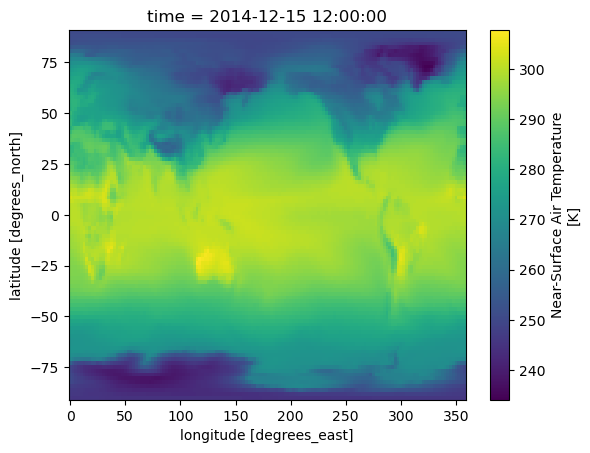

In [9]:
# First plot
ds.tas.sel(time=ds.time[-1]).plot();

## 3. Data analysis

### Example 1: All-time average and plotting

In [10]:
# default plot size
plt.rcParams['figure.figsize'] = (14, 8)

In [11]:
tas_avg = ds.tas.mean(dim='time')

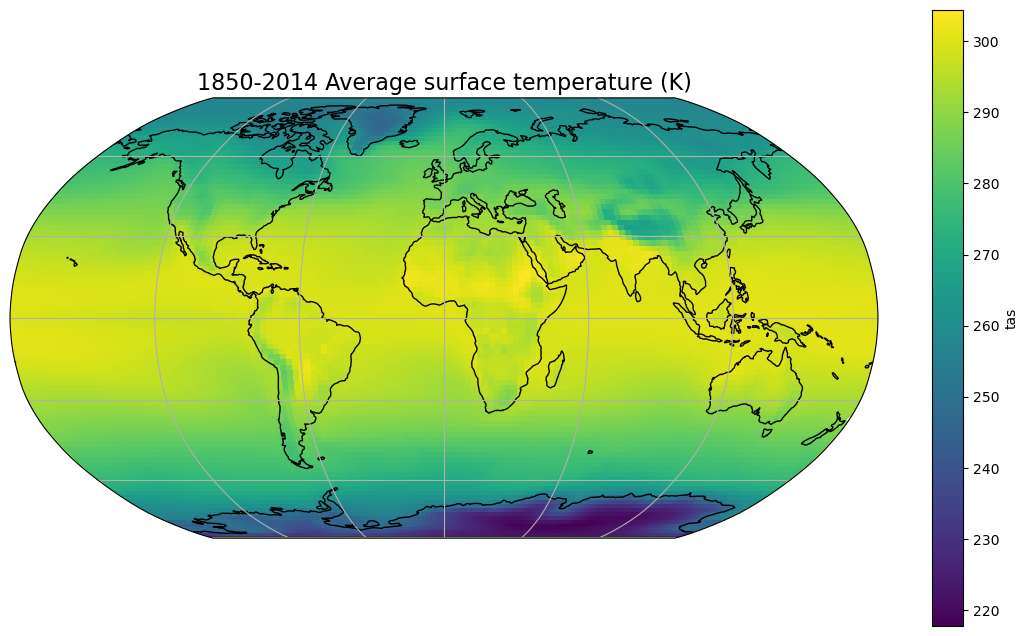

In [12]:
ax = plt.axes(projection=ccrs.Robinson())
tas_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines();
ax.set_title('1850-2014 Average surface temperature (K)', fontsize = 16);

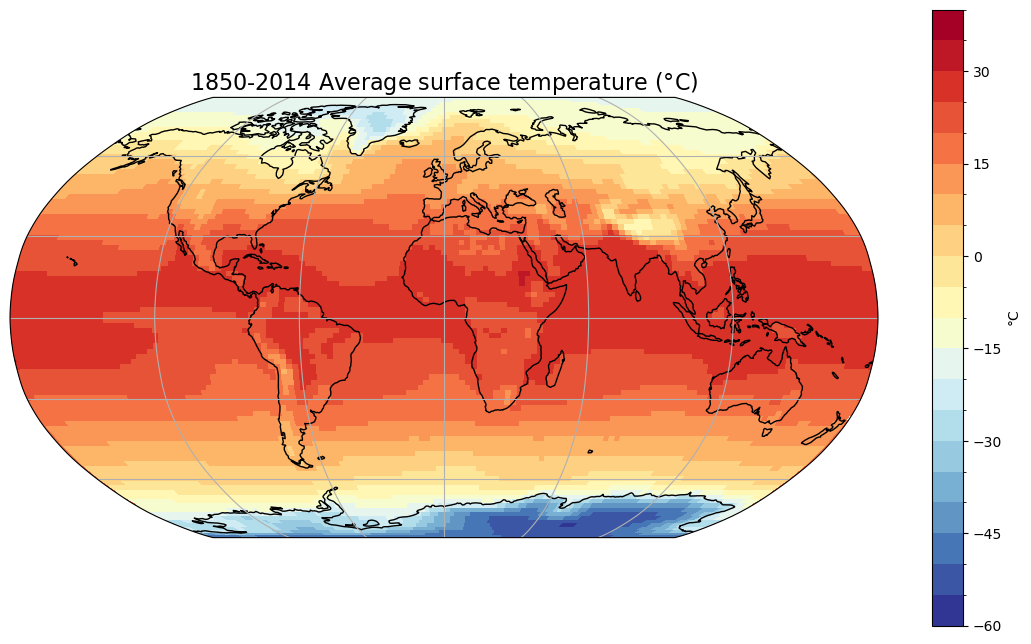

In [44]:
# Convert to degree Celcius
tas_avg_c = tas_avg - 273.15

# Plot customization
ax = plt.axes(projection=ccrs.Robinson())
tas_avg_c.plot(ax=ax, transform=ccrs.PlateCarree(),cmap ='RdYlBu_r',levels=np.linspace(-60,40,21),center=False,cbar_kwargs={'label':r'$\degree$C'}) 
ax.coastlines(); ax.gridlines();
ax.set_title(r'1850-2014 Average surface temperature ($\degree$C)', fontsize = 16);

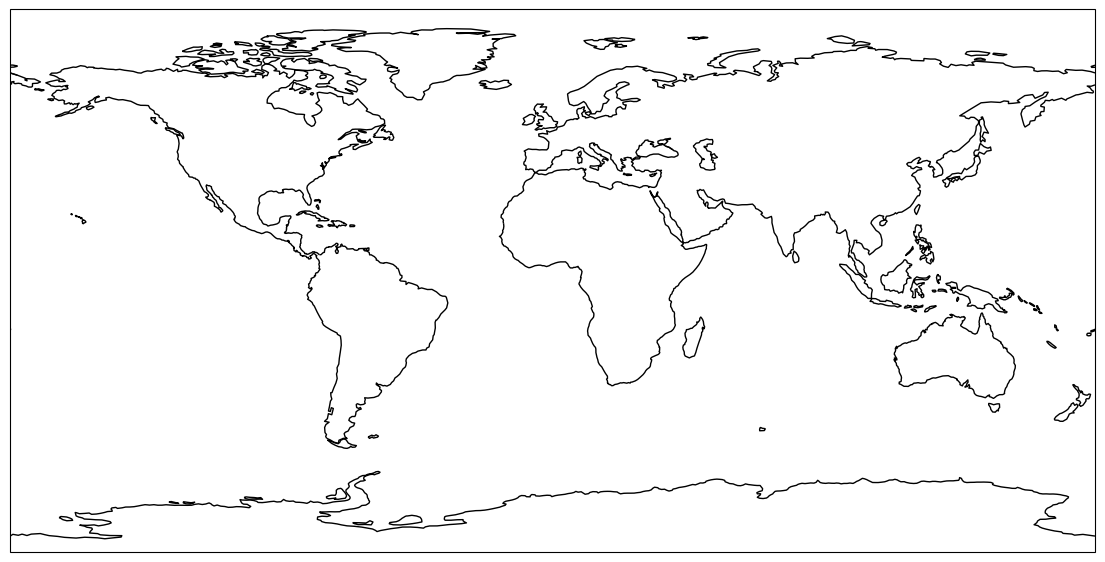

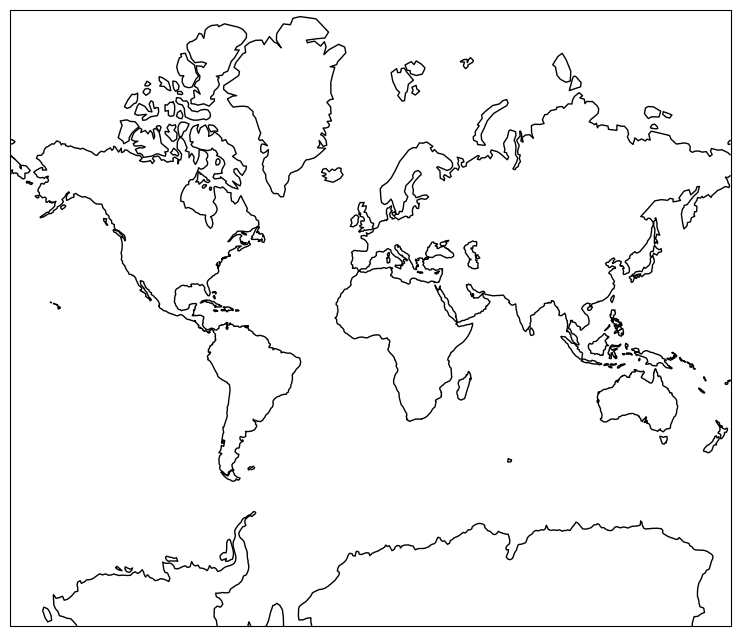

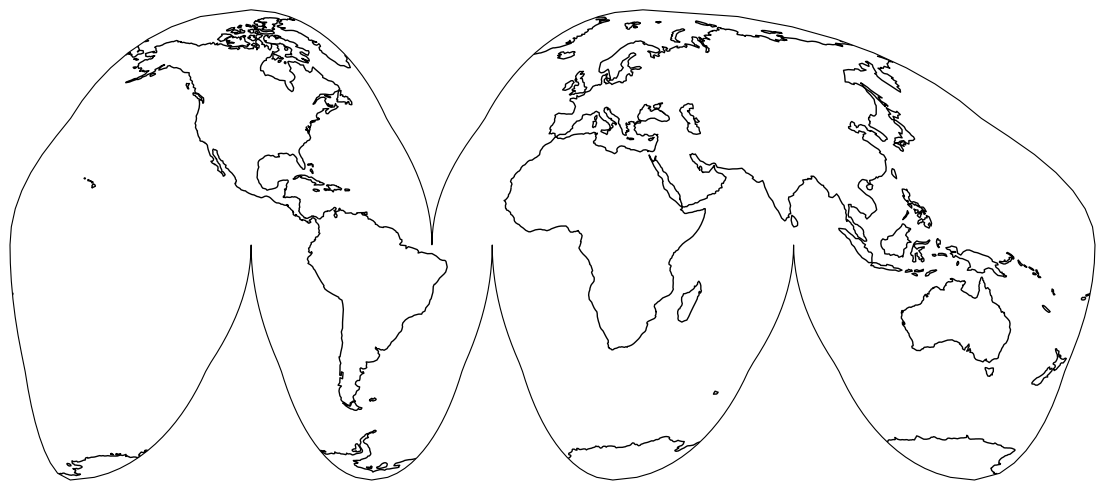

In [14]:
# Bonus: More map projection from Cartopy
# See more: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#interruptedgoodehomolosine
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()
plt.show()

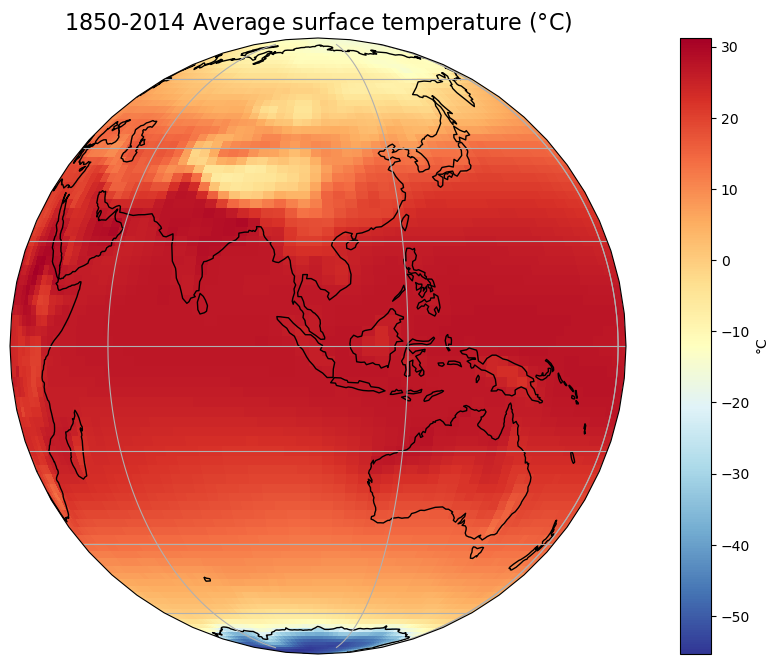

In [45]:
# Remark: Difference between "projection" and "transform"
# Example
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=103.0, central_latitude=0.0))
tas_avg_c.plot(ax=ax, transform=ccrs.PlateCarree(),cmap ='RdYlBu_r',center=False,cbar_kwargs={'label':r'$\degree$C'}) 
ax.coastlines(); ax.gridlines();
ax.set_title(r'1850-2014 Average surface temperature ($\degree$C)', fontsize = 16);

### Example 2: Coordinate-area weighting of the data & plotting of time series

Since the area each latitude circle enclosed is inequal --> weight them!
<br>2.1 Weight manually
<br>2.2 Use the "areacella" data array (OBSOLETE -- Skip until figure out how to make it work again.)


#### 2.1 Weight manually

In [16]:
weight = np.cos(np.deg2rad(ds.lat))
weight = weight / weight.sum()

In [17]:
# We've normalized the weight, so the sum should be 1.
weight.sum()

<xarray.DataArray 'lat' ()> Size: 8B
array(1.)

In [18]:
# Regular mean works with zonal avg. (Each longitude line is half of a great circle.)
zonal_avg_tas = ds.tas.mean(dim='lon')
zonal_avg_tas

<xarray.DataArray 'tas' (time: 1980, lat: 96)> Size: 760kB
dask.array<mean_agg-aggregate, shape=(1980, 96), dtype=float32, chunksize=(990, 96), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * time     (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

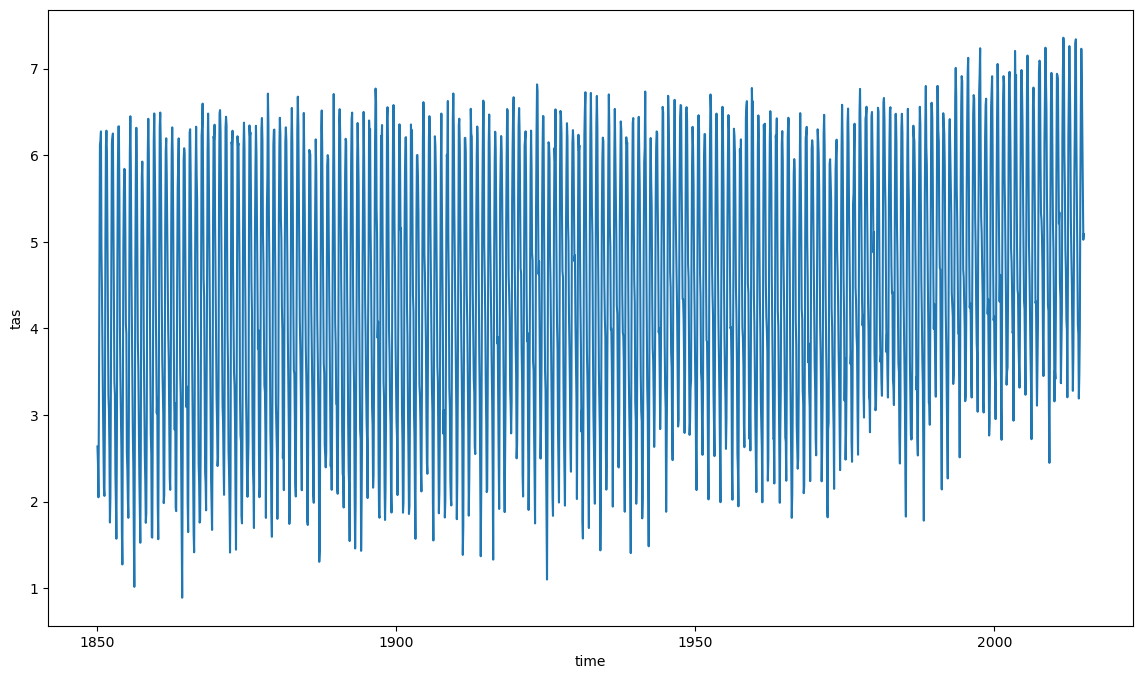

In [19]:
tas_avg_noweight = zonal_avg_tas.mean(dim='lat')
tas_avg_noweight_c = tas_avg_noweight - 273.15
tas_avg_noweight_c.plot();

In [20]:
# With weight
tas_avg_weight = zonal_avg_tas*weight

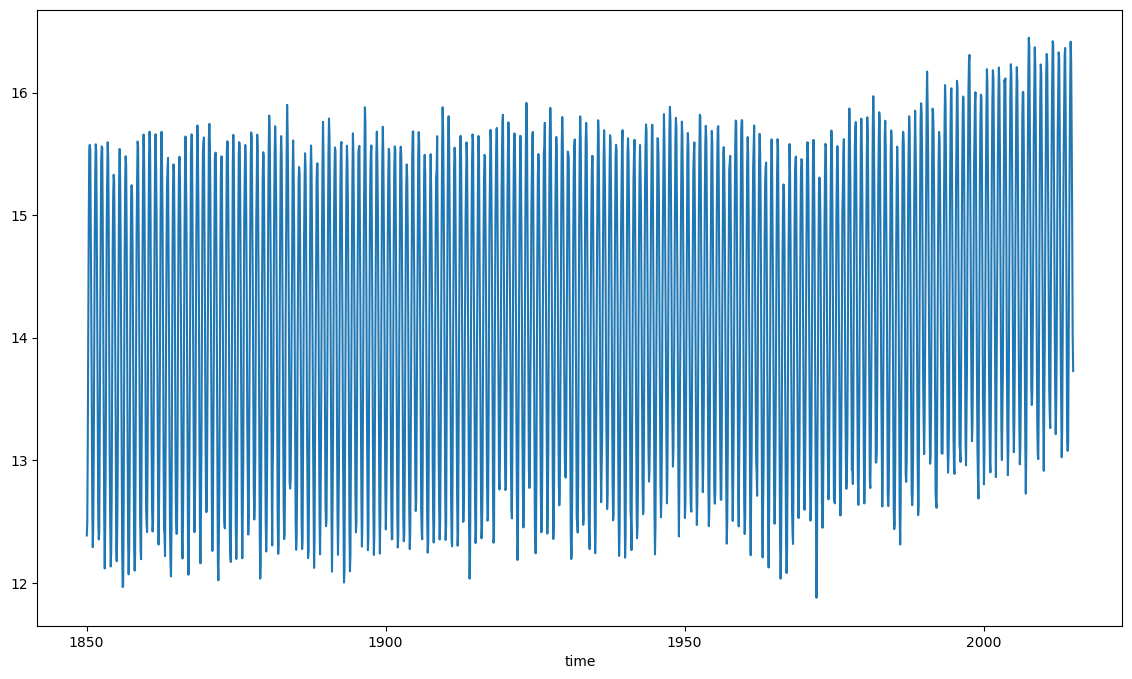

In [21]:
tas_avg_weight = tas_avg_weight.sum(dim='lat')
tas_avg_weight_c = tas_avg_weight - 273.15
tas_avg_weight_c.plot();

In [34]:
tas_ww_as = tas_avg_weight_c.resample(time='YS').mean()
tas_ww_a = tas_avg_weight_c.resample(time='YE').mean()

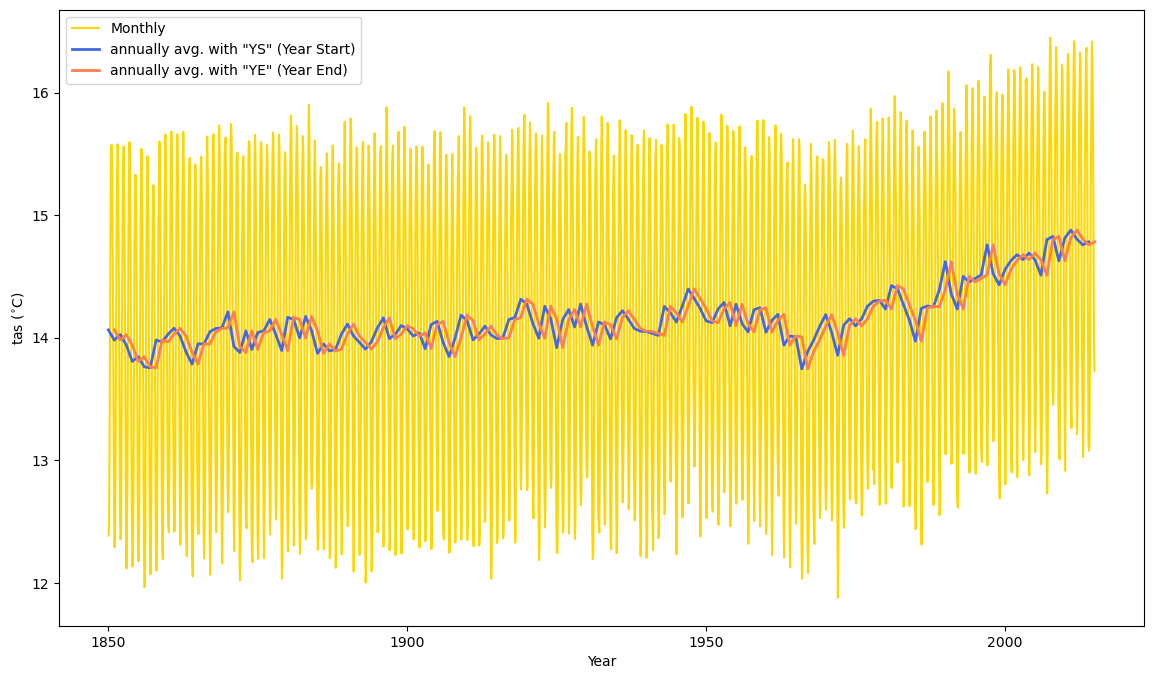

In [41]:
tas_avg_weight_c.plot(color='gold',label='Monthly');
tas_ww_as.plot(c='royalblue',label='annually avg. with "YS" (Year Start)',lw=2);
tas_ww_a.plot(c='coral',label='annually avg. with "YE" (Year End)',lw=2);
plt.ylabel(r'tas ($^{\circ}$C)')
plt.xlabel('Year')
plt.legend();

### Example 3: Data slicing and grouping

Now loading a pressure at sea level dataset. One way to look up for the CMIP's variable id: click on "Spreadsheet view of the variable definitions" on https://earthsystemcog.org/projects/wip/CMIP6DataRequest . The variable id of the sea level pressure is "psl".

In [24]:
# Looking for sea-level pressure dataset
# use "query" to search for a variable
# In this example: Search for
df_psl = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'psl' & experiment_id == 'historical' & institution_id == 'NCAR'")
df_psl

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56053,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
56243,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
56296,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
59440,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61732,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62710,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
62924,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63273,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
63343,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
64593,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


In [25]:
zstore_psl = df_psl.zstore.values[-1]
mapper_psl = fsspec.get_mapper(zstore_psl)

ds_psl = xr.open_zarr(mapper_psl, consolidated=True)

In [26]:
ds_psl

<xarray.Dataset> Size: 110MB
Dimensions:    (lat: 96, nbnd: 2, lon: 144, time: 1980)
Coordinates:
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
    lat_bnds   (lat, nbnd) float64 2kB dask.array<chunksize=(96, 2), meta=np.ndarray>
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    lon_bnds   (lon, nbnd) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
  * time       (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    psl        (time, lat, lon) float32 109MB dask.array<chunksize=(990, 96, 144), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    DODS_EXTRA.Unlimited_Dimension:  time
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            674885.0
    branch_time_in_parent:           10950.0
    ...                              ...
    tracking_id:                     hdl:21.14100/878194b2-c43d-413d-943e-608...
    variable_id:                     psl
    variant_info:                    CMIP6 CESM2-FV2 historical experiment (1...
    variant_label:                   r2i1p1f1
    netcdf_tracking_ids:             hdl:21.14100/878194b2-c43d-413d-943e-608...
    version_id:                      v20200226

### Select a specific period of time

In [27]:
psl_2012 = ds_psl.sel(time='2012')
psl_2012

<xarray.Dataset> Size: 670kB
Dimensions:    (lat: 96, nbnd: 2, lon: 144, time: 12)
Coordinates:
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
    lat_bnds   (lat, nbnd) float64 2kB dask.array<chunksize=(96, 2), meta=np.ndarray>
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    lon_bnds   (lon, nbnd) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
  * time       (time) object 96B 2012-01-15 12:00:00 ... 2012-12-15 12:00:00
    time_bnds  (time, nbnd) object 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    psl        (time, lat, lon) float32 664kB dask.array<chunksize=(12, 96, 144), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    DODS_EXTRA.Unlimited_Dimension:  time
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            674885.0
    branch_time_in_parent:           10950.0
    ...                              ...
    tracking_id:                     hdl:21.14100/878194b2-c43d-413d-943e-608...
    variable_id:                     psl
    variant_info:                    CMIP6 CESM2-FV2 historical experiment (1...
    variant_label:                   r2i1p1f1
    netcdf_tracking_ids:             hdl:21.14100/878194b2-c43d-413d-943e-608...
    version_id:                      v20200226

In [28]:
psl_2012_Jul = ds_psl.sel(time='2012-07')
psl_2012_Jul

<xarray.Dataset> Size: 61kB
Dimensions:    (lat: 96, nbnd: 2, lon: 144, time: 1)
Coordinates:
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
    lat_bnds   (lat, nbnd) float64 2kB dask.array<chunksize=(96, 2), meta=np.ndarray>
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    lon_bnds   (lon, nbnd) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
  * time       (time) object 8B 2012-07-15 12:00:00
    time_bnds  (time, nbnd) object 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    psl        (time, lat, lon) float32 55kB dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    DODS_EXTRA.Unlimited_Dimension:  time
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            674885.0
    branch_time_in_parent:           10950.0
    ...                              ...
    tracking_id:                     hdl:21.14100/878194b2-c43d-413d-943e-608...
    variable_id:                     psl
    variant_info:                    CMIP6 CESM2-FV2 historical experiment (1...
    variant_label:                   r2i1p1f1
    netcdf_tracking_ids:             hdl:21.14100/878194b2-c43d-413d-943e-608...
    version_id:                      v20200226

### Use slice to select years, e.g. 2001-2010

In [29]:
psl_2001_2010 = ds_psl.sel(time=slice('2001','2010'))

In [30]:
psl_2001_2010

<xarray.Dataset> Size: 7MB
Dimensions:    (lat: 96, nbnd: 2, lon: 144, time: 120)
Coordinates:
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
    lat_bnds   (lat, nbnd) float64 2kB dask.array<chunksize=(96, 2), meta=np.ndarray>
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    lon_bnds   (lon, nbnd) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
  * time       (time) object 960B 2001-01-15 12:00:00 ... 2010-12-15 12:00:00
    time_bnds  (time, nbnd) object 2kB dask.array<chunksize=(120, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    psl        (time, lat, lon) float32 7MB dask.array<chunksize=(120, 96, 144), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    DODS_EXTRA.Unlimited_Dimension:  time
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            674885.0
    branch_time_in_parent:           10950.0
    ...                              ...
    tracking_id:                     hdl:21.14100/878194b2-c43d-413d-943e-608...
    variable_id:                     psl
    variant_info:                    CMIP6 CESM2-FV2 historical experiment (1...
    variant_label:                   r2i1p1f1
    netcdf_tracking_ids:             hdl:21.14100/878194b2-c43d-413d-943e-608...
    version_id:                      v20200226

### Use "groupby" to group the same calendar month together

In [31]:
# Average of each calendar month from 2001-2010 (want to see annual cycle)
psl_mcy = psl_2001_2010.psl.groupby('time.month').mean()

In [32]:
psl_mcy

<xarray.DataArray 'psl' (month: 12, lat: 96, lon: 144)> Size: 664kB
dask.array<stack, shape=(12, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/20)
    _ChunkSizes:    [1, 96, 144]
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        PSL
    description:    not, in general, the same as surface pressure
    frequency:      mon
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Level Pressure
    type:           real
    units:          Pa
    variable_id:    psl

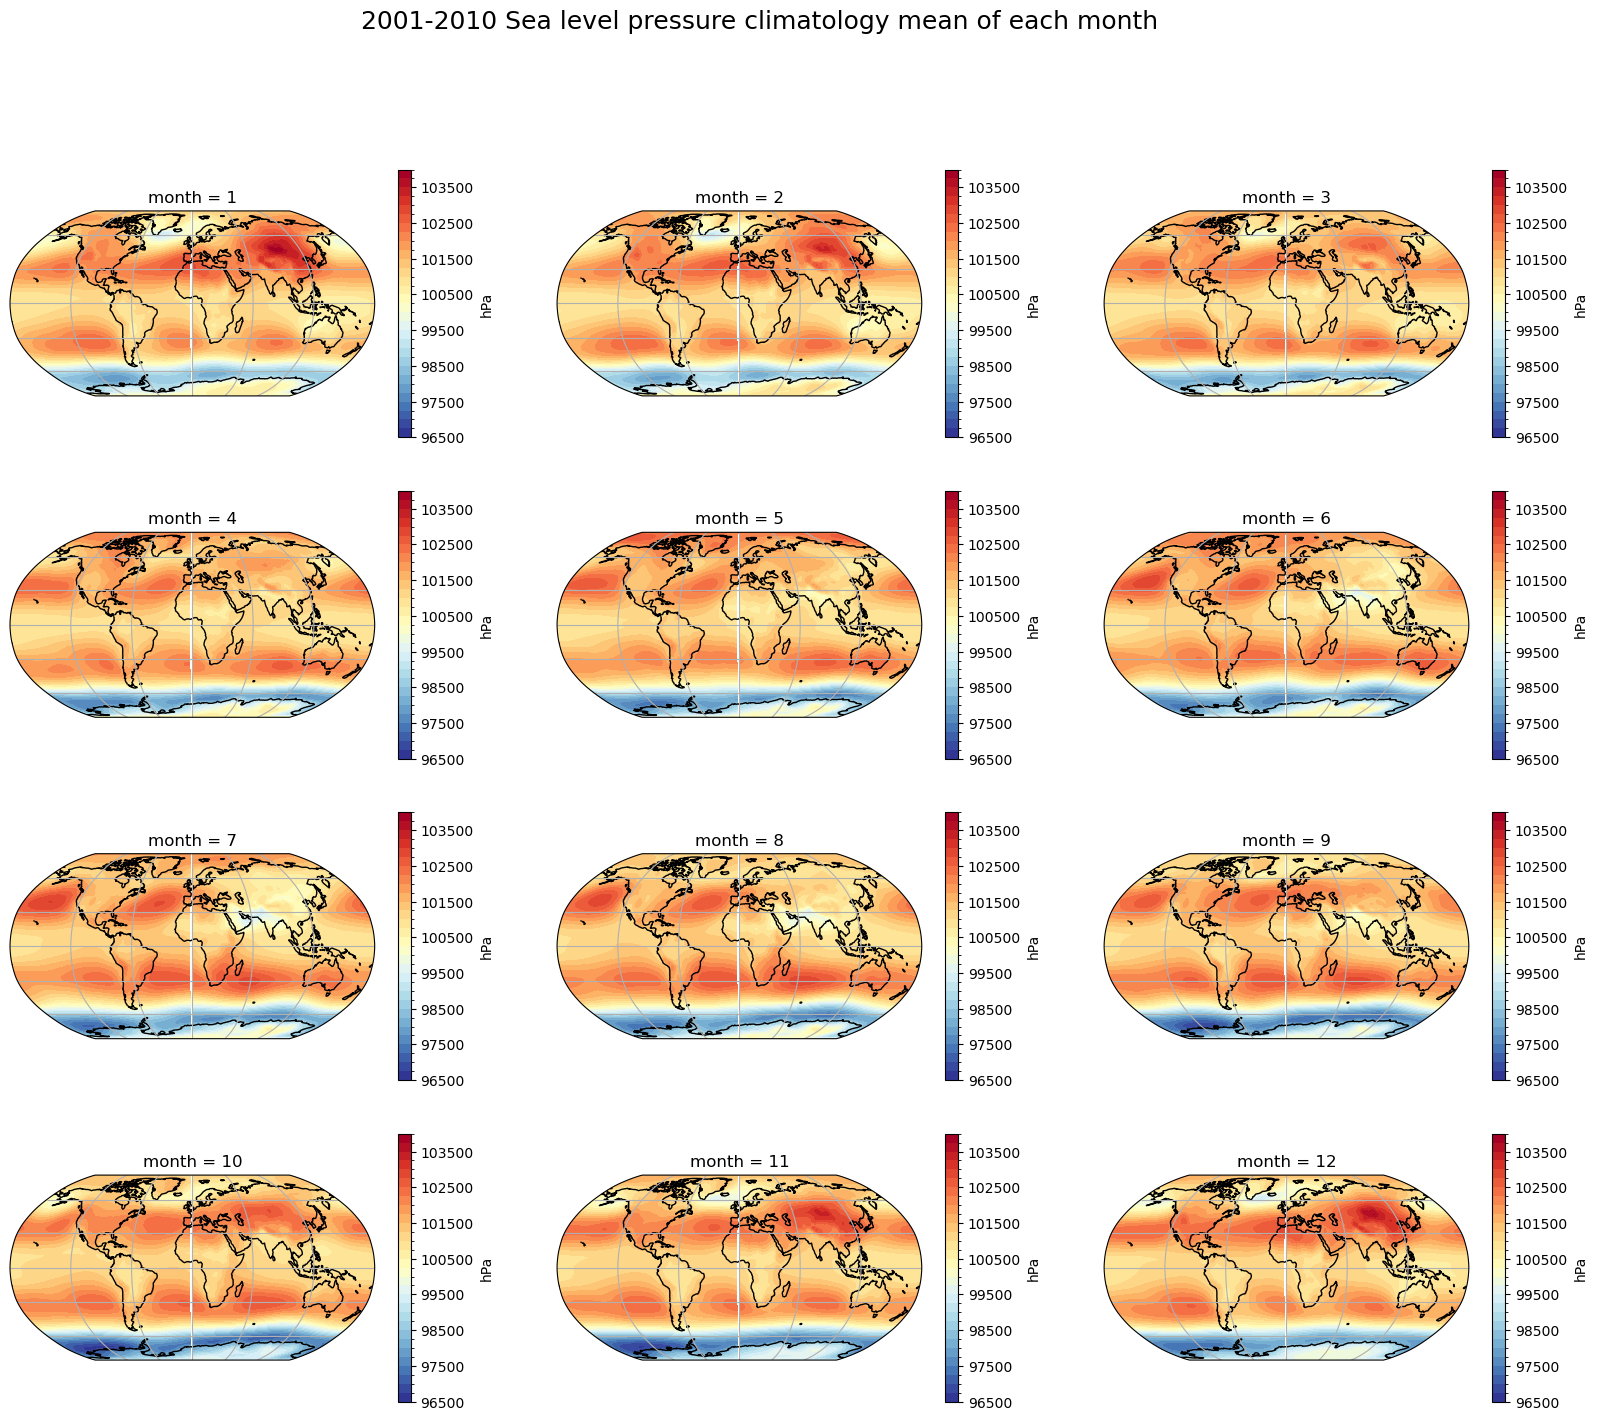

In [33]:
plt.figure(figsize=(20, 16))

for i in range(1,13):
    ax = plt.subplot(4, 3, i, projection=ccrs.Robinson())
    psl_mcy.sel(month=i).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=np.linspace(96500,104000,31),cmap='RdYlBu_r',cbar_kwargs={'label':'hPa'})
    ax.coastlines(); ax.gridlines();
    plt.title('month = %d'%i)

plt.suptitle('2001-2010 Sea level pressure climatology mean of each month',fontsize = 18);

## More examples from Pangeo gallery
- http://gallery.pangeo.io/index.html

## >>> Next: Your very own project! >>>

### Quick ideas
- Southern Oscillation Index (SOI): use the built-in interpolation function to find the sea level pressure at Tahiti and Darwin, Australia to calculate SOI (https://www.ncdc.noaa.gov/teleconnections/enso/indicators/soi/)
- etc.

## CMIP6 License